In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('.\All_Samples\OriginationCombined.csv', low_memory=False)

In [4]:
data.head()

cred_scr  fst_paymnt_dte fst_hmebyr_flg  maturty_dte  metro_stat_area  \
0       722          200504              N       203503                0   
1       759          200503              N       203502                0   
2       591          200504              N       203503            39100   
3       792          200503              N       203502            39100   
4       725          200503              N       203502            48864   

   mort_insur_pctg  nbr_units occu_status  orig_cmbnd_ln_to_value  \
0                0          1           P                      80   
1                0          1           P                      25   
2                0          1           P                      48   
3                0          1           P                      90   
4                0          1           P                      49   

   orig_dbt_to_incm    ...     proptype  zipcode     ln_sq_nbr ln_purps  \
0                48    ...           MH    98200  F105Q1000064        P   
1                25    ...           SF    20600  F105Q1000076        N   
2                34    ...           SF    12500  F105Q1000087        C   
3                33    ...           SF    12500  F105Q1000130        P   
4                41    ...           SF    19700  F105Q1000195        N   

  orig_ln_trm nbr_brwrs       slr_name           srvcr_name  spr_confrm_flg  \
0         360         2  Other sellers      Other servicers               N   
1         360         2  Other sellers  PNCMTGESERVICES,INC               N   
2         360         2  Other sellers      Other servicers               N   
3         360         2  Other sellers      Other servicers               N   
4         360         2  Other sellers             USBANKNA               N   

  Year_Orig  
0      2005  
1      2005  
2      2005  
3      2005  
4      2005  

[5 rows x 27 columns]

Text(0,0.5,'Credit Score')

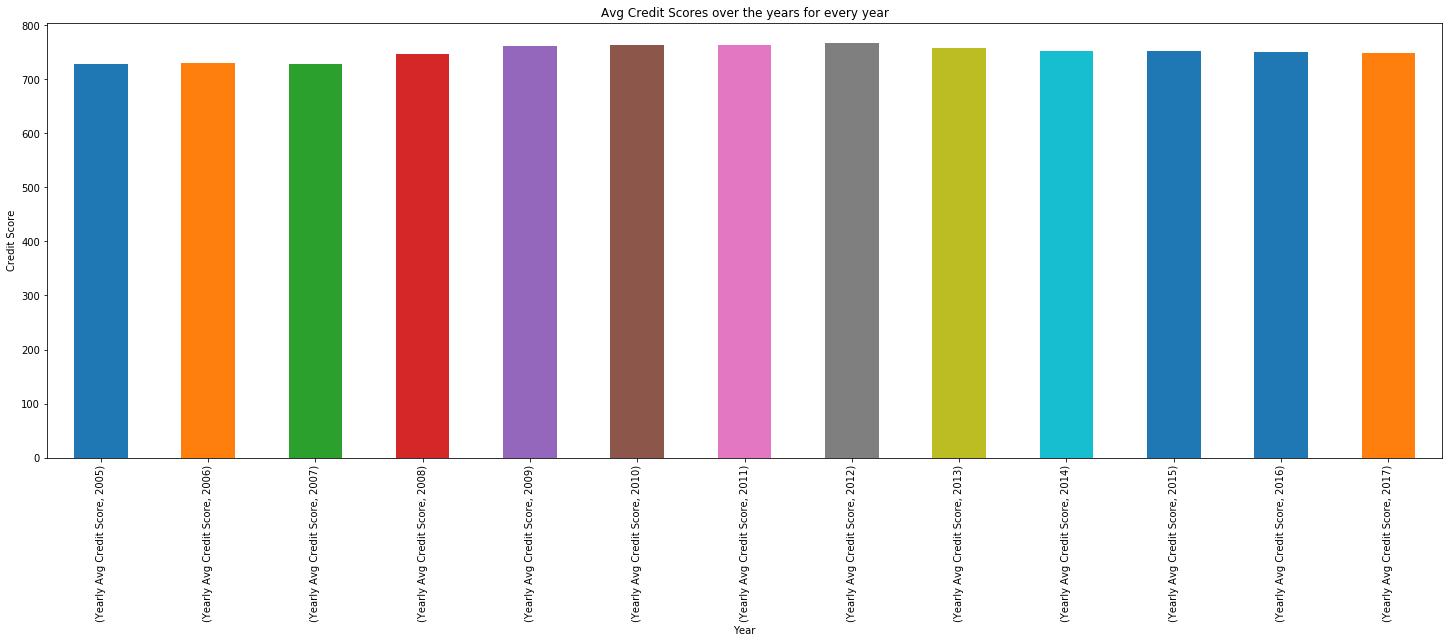

In [5]:
#Avg Credit Score by year
year_DF= data.groupby(['Year_Orig'])['cred_scr'].mean().to_frame(name = 'Yearly Avg Credit Score')

year_DF.unstack().plot(title='Avg Credit Scores over the years for every year', kind='bar', stacked=True, figsize=(25,8))

plt.xlabel('Year')
plt.ylabel('Credit Score')

Text(0,0.5,'Credit Score')

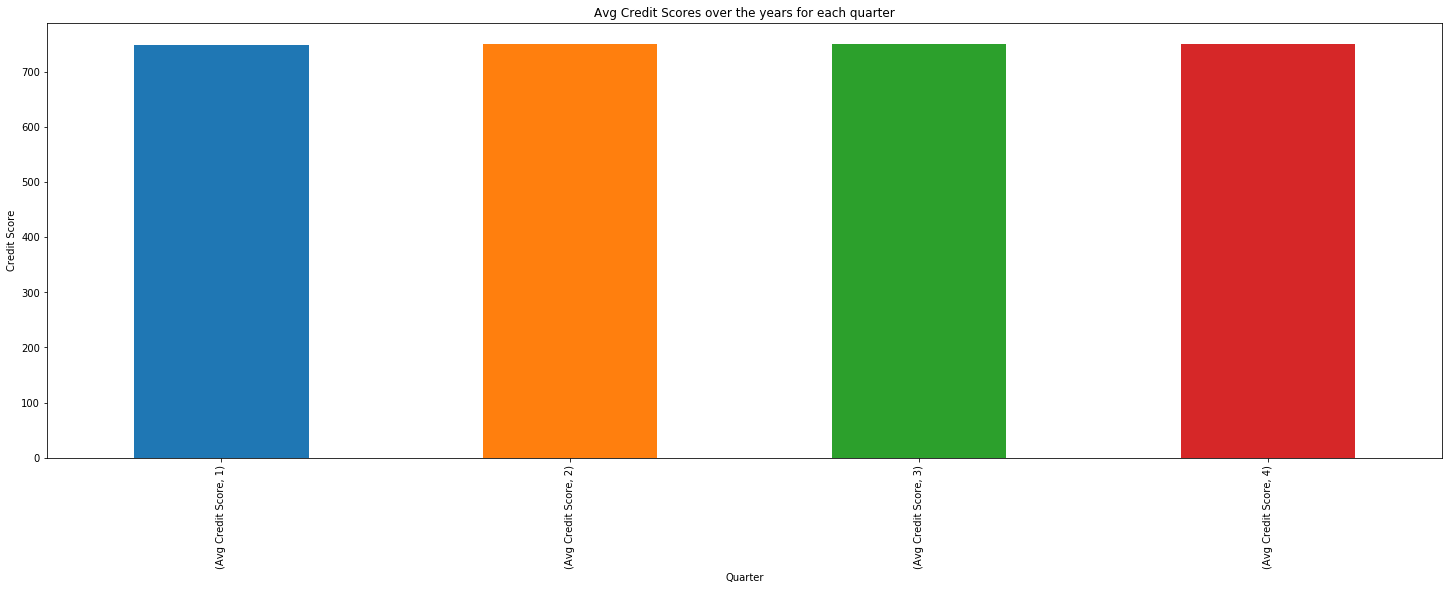

In [6]:
#Adding Quarter number for better understanding of EDA
data['Quarter'] = [x for x in data['ln_sq_nbr'].apply(lambda x: x[5:6])]

Quarter_DF= data.groupby(['Quarter'])['cred_scr'].mean().to_frame(name = 'Avg Credit Score')

Quarter_DF.unstack().plot(title='Avg Credit Scores over the years for each quarter', kind='bar', stacked=True, figsize=(25,8))

plt.xlabel('Quarter')
plt.ylabel('Credit Score')


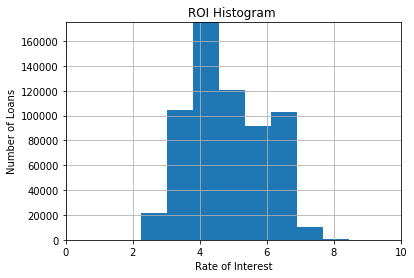

In [7]:
#Plotting distribution of interest rates charged
n, bins, patches = plt.hist(data.orig_intrst_rate)
plt.xlabel('Rate of Interest')
plt.ylabel('Number of Loans')
plt.title(r'ROI Histogram ')
plt.axis([0, 10, 0, 175000])
plt.grid(True)
plt.show()

Text(0,0.5,'Interest Rate in %')

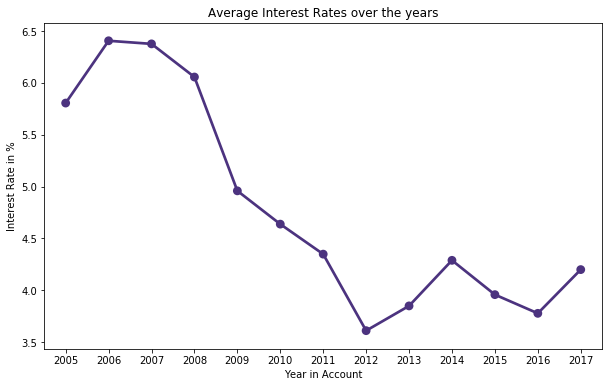

In [36]:
# Interest rates over the years
interest_df = pd.DataFrame(data.groupby('Year_Orig')['orig_intrst_rate'].mean())
# Creating subplots
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1, 1, 1)

# Creating plot for average interest rates
ax1 = sns.pointplot(x=interest_df.index, y=interest_df.orig_intrst_rate, data=interest_df, ax=ax1, color="#4c337f") 
ax1.set_title('Average Interest Rates over the years')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Interest Rate in %")

In [8]:
state_df = data.groupby(['propstate'])['ln_sq_nbr'].count().reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

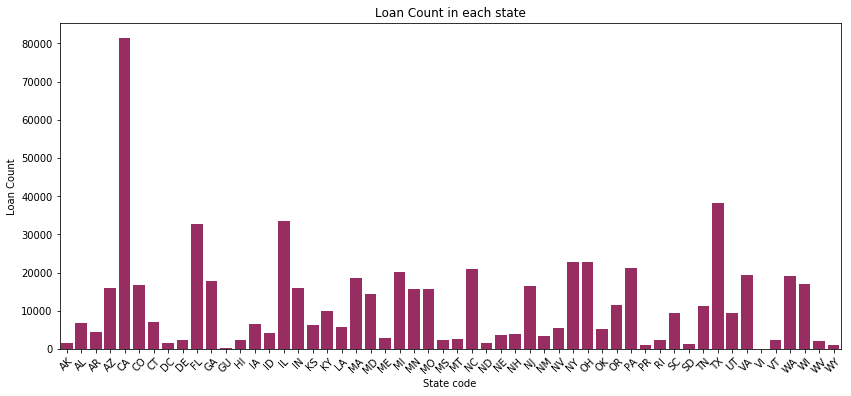

In [12]:
#Plotting graph to find which states has most loans
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.barplot(x= state_df.propstate, y= state_df.ln_sq_nbr, data=state_df, ax=ax1, color="#a81c5f") 
ax1.set_title('Loan Count in each state')
ax1.set_xlabel("State code")
ax1.set_ylabel("Loan Count")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

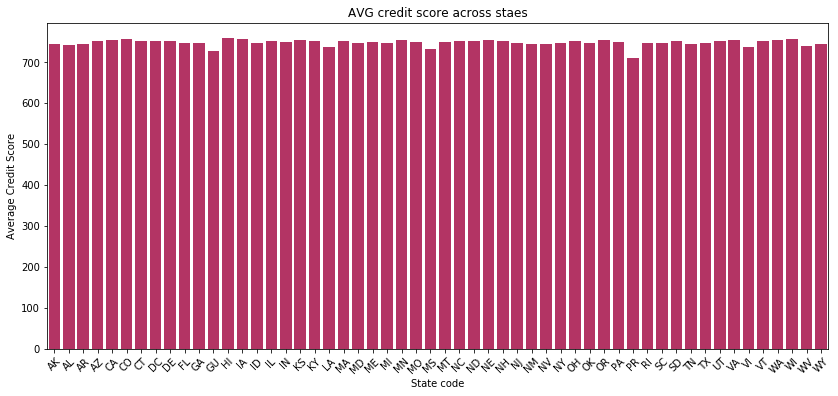

In [48]:
# Credit Scores across the states
state_df = data.groupby(['propstate'])['cred_scr'].mean().reset_index()
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.barplot(x= state_df.propstate, y= state_df.cred_scr, data=state_df, ax=ax1, color="#c81f5f") 
ax1.set_title('AVG credit score across staes')
ax1.set_xlabel("State code")
ax1.set_ylabel("Average Credit Score")
plt.xticks(rotation=45)

Text(0,0.5,'Orig_UPB in millions')

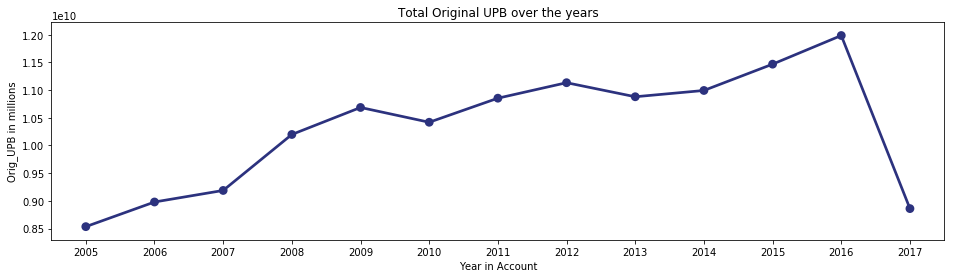

In [22]:
#Plotting total upb trend over the years
prop_df = pd.DataFrame(data.groupby(['Year_Orig'])['orig_upb'].sum())
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.pointplot(x=prop_df.index, y=prop_df.orig_upb, data=prop_df, ax=ax1, color="#2c327e") 
ax1.set_title('Total Original UPB over the years')
ax1.set_xlabel("Year in Account")
ax1.set_ylabel("Orig_UPB in millions")

C:\Users\rishi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


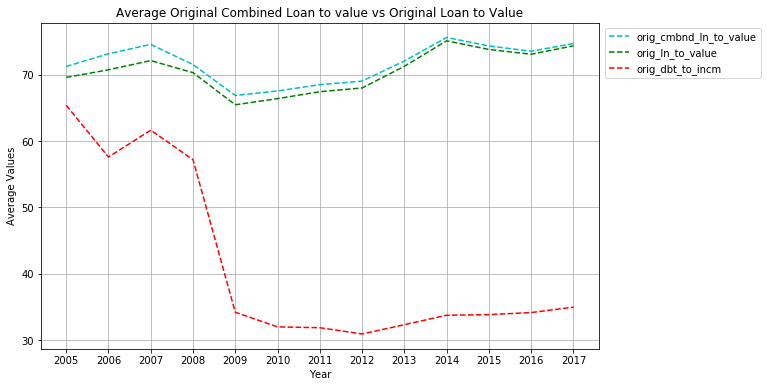

In [21]:
# Comparing loan to value , combind loans to value and original debt to income trends
loantovalue_df = data.groupby('Year_Orig')['orig_cmbnd_ln_to_value', 'orig_ln_to_value', \
                                          'orig_dbt_to_incm'].mean()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

ax1.plot(loantovalue_df.index, loantovalue_df.orig_cmbnd_ln_to_value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1.plot(loantovalue_df.index, loantovalue_df.orig_ln_to_value, label='orig_ln_to_value', color='g', linestyle='--')
ax1.plot(loantovalue_df.index, loantovalue_df.orig_dbt_to_incm, label='orig_dbt_to_incm', color='r', linestyle='--')

ax1.set_title('Average Original Combined Loan to value vs Original Loan to Value')
plt.xticks(loantovalue_df.index)
plt.xlabel('Year')
plt.ylabel('Average Values')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')
plt.show()

In [37]:
#Graph showing how many times the loan was a first time loan
firstloan_df = pd.DataFrame(data.groupby('fst_hmebyr_flg')['ln_sq_nbr'].count())

Text(0,0.5,'Number of Loans')

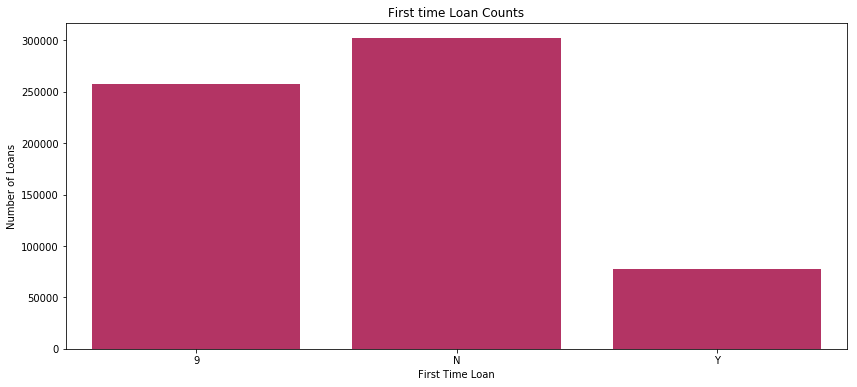

In [39]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.barplot(x= firstloan_df.index, y= firstloan_df.ln_sq_nbr, data=firstloan_df, ax=ax1, color="#c81f5f") 
ax1.set_title('First time Loan Counts')
ax1.set_xlabel("First Time Loan")
ax1.set_ylabel("Number of Loans")

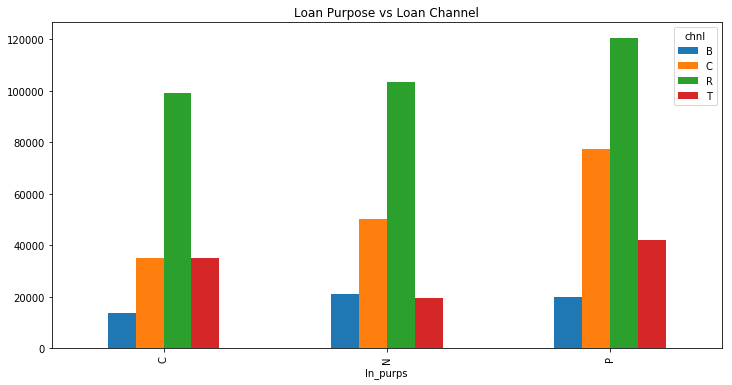

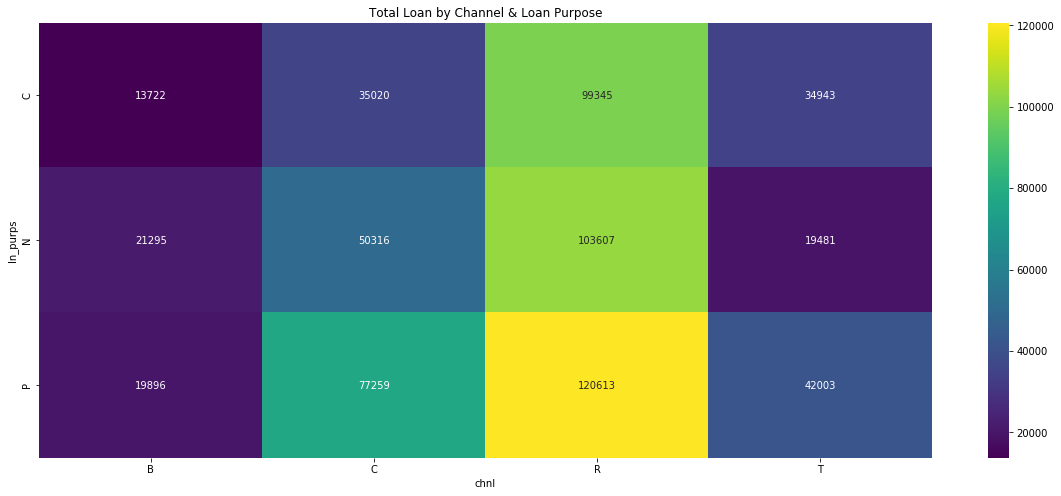

In [40]:
# Graph indicating how many loans where taken via which channel and which purpose
loan_pur_df = data.groupby(['ln_purps', 'chnl']).size().unstack()
loan_pur_df.plot(title='Loan Purpose vs Loan Channel', kind='bar', stacked=False, figsize=(12,6))
plt.figure(figsize=(20, 8))
plt.title('Total Loan by Channel & Loan Purpose')
sns.heatmap(loan_pur_df, annot=True, fmt="g", cmap='viridis')
plt.show()



Text(0,0.5,'Loan Provider')

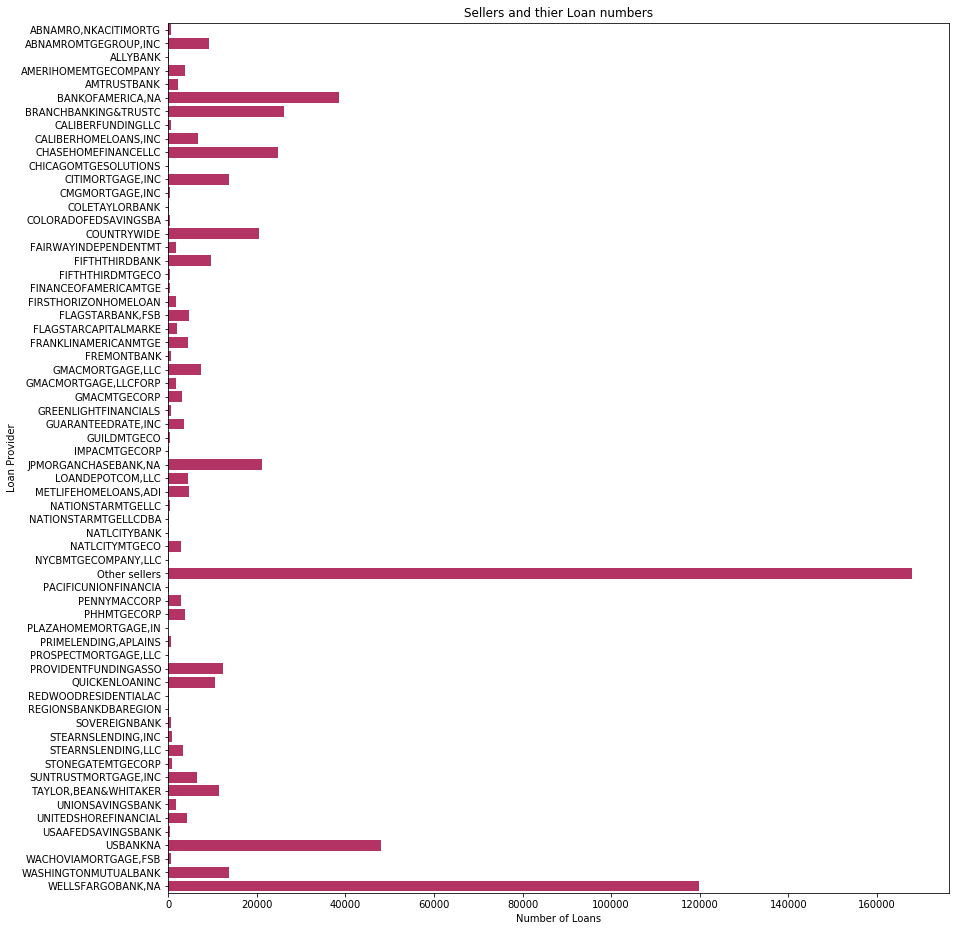

In [47]:
#Graph showing which are the top players in in giving out laons to people
seller_df = pd.DataFrame(data.groupby('slr_name')['ln_sq_nbr'].count())
fig = plt.figure(figsize=(14,16))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.barplot(y= seller_df.index, x= seller_df.ln_sq_nbr, data=seller_df, ax=ax1, color="#c81f5f") 
ax1.set_title('Sellers and thier Loan numbers')
ax1.set_xlabel("Number of Loans")
ax1.set_ylabel("Loan Provider")


In [ ]:
# Tried to plot pair plot to find relation between original interest rate and all other featues but kernel couldn't laod the graph
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['orig_intrst_rate'])

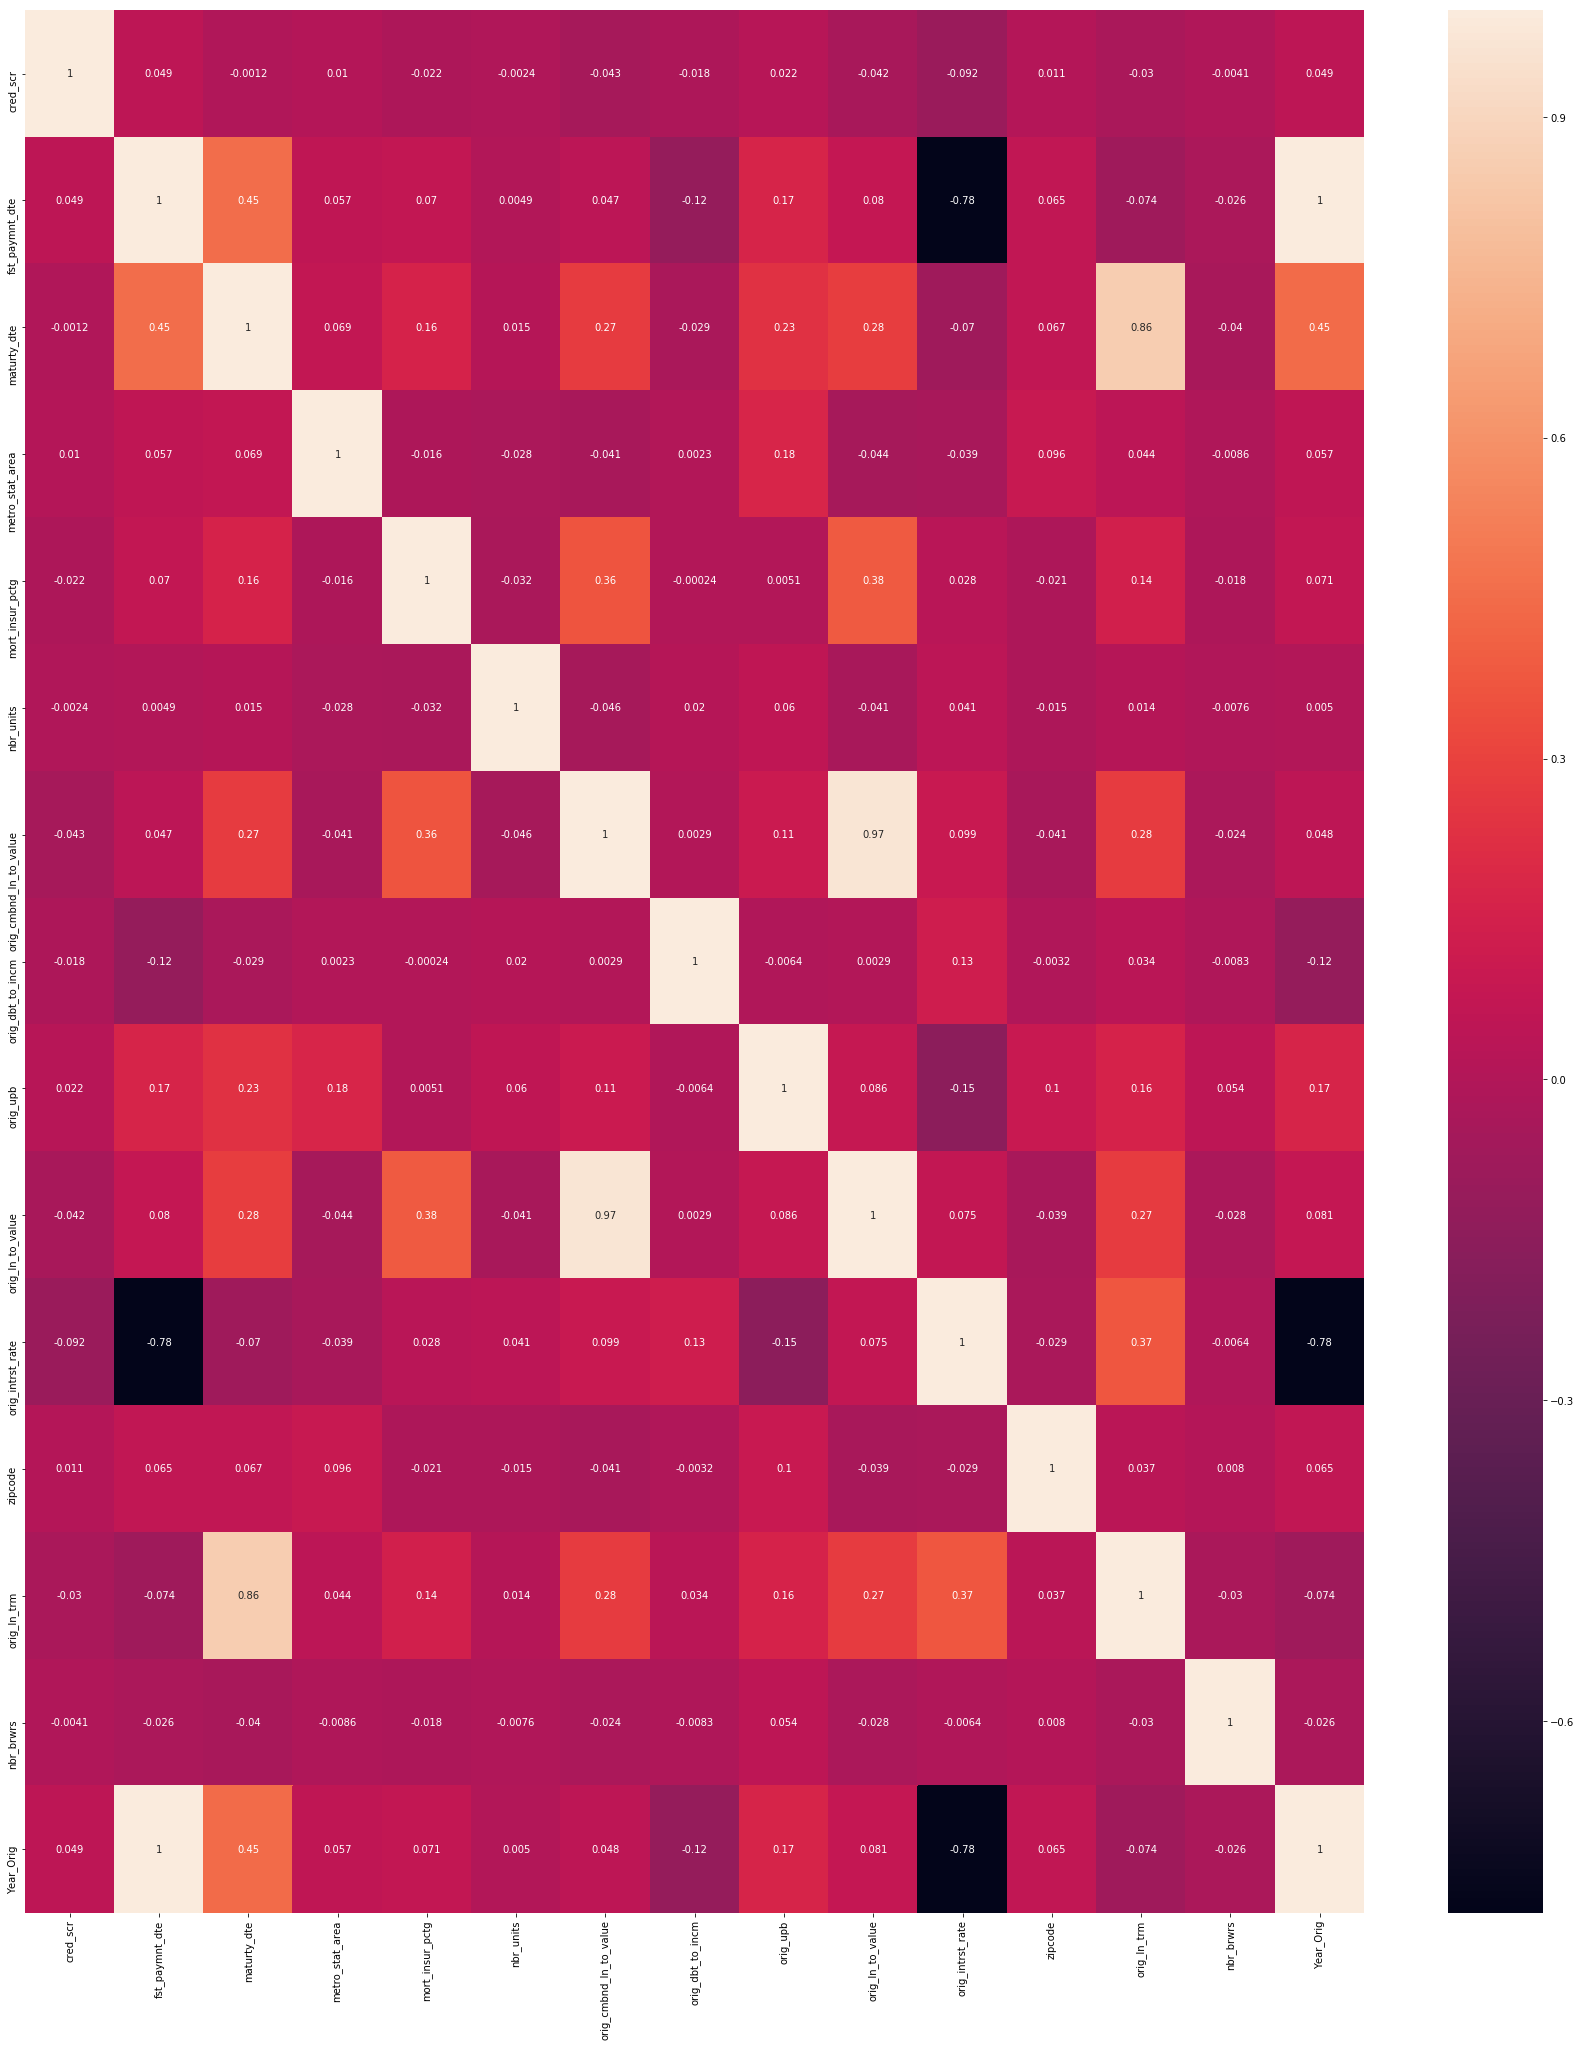

In [19]:
# Correlation between interest rate other features
corr = data.corr()
f, ax = plt.subplots(figsize=(30,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot = True)